<a href="https://colab.research.google.com/github/aderr011/2015MortalityExamination/blob/add-examination-file/DSCI_235_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and Dataset Examination

In [17]:
%autosave 0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

Autosave disabled


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data = pd.read_csv(r'/content/drive/MyDrive/2015_data.csv')
data.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,...,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
0,1,NaN,3.0,1,1,M,1,84,NaN,42,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
1,1,NaN,6.0,1,1,M,1,70,NaN,40,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
2,1,NaN,3.0,1,1,F,1,91,NaN,44,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6
3,1,NaN,3.0,1,1,F,1,40,NaN,34,...,NaN,NaN,NaN,3,NaN,NaN,2,3,100,8
4,1,NaN,5.0,1,1,F,1,89,NaN,43,...,NaN,NaN,NaN,1,NaN,NaN,1,1,100,6


As seen in the .head() call, there are many columns that contain mostly NaN values. These columns are largely not useful in the overall understanding the examination of the data, so they will be avoided mostly. Below I will list all of the columns that the dataset contains.

In [20]:
data.columns

Index(['resident_status', 'education_1989_revision', 'education_2003_revision',
       'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type',
       'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27',
       'age_recode_12', 'infant_age_recode_22',
       'place_of_death_and_decedents_status', 'marital_status',
       'day_of_week_of_death', 'current_data_year', 'injury_at_work',
       'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code',
       'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
       'icd_code_10th_revision', '358_cause_recode', '113_cause_recode',
       '130_infant_cause_recode', '39_cause_recode',
       'number_of_entity_axis_conditions', 'entity_condition_1',
       'entity_condition_2', 'entity_condition_3', 'entity_condition_4',
       'entity_condition_5', 'entity_condition_6', 'entity_condition_7',
       'entity_condition_8', 'entity_condition_9', 'entity_condition_10',
       'entity_condition

#Overview of DataSet
###2015 Mortality Dataset


This dataset is from the Centers for Disease Control and Prevention (CDC). It contains information from every death recorded in the United States during the year 2015. It includes 77 columns each representing another characteristic of the specific death.

As referenced in my project proposal, this is a very grim topic, and is not responsible to view the deaths of family members and close friends as another row in a dataset. But with this data, the goal is to examine the deaths of residents of the United States and create solutions to minimize the deaths that occur. 

This dataset is heavily based on the documentation given by the CDC for their csv files, as most entries in the dataset are linked with long strings, for examples for the column labeled 'activity_code' which is supposed to represent the activity that was being done during the time of death, the value 4 is linked with 'While resting, sleeping, eating (vital activities)'. Because of this strong reliance on documentation, I will include a cheat sheeet.

This dataset was taken from Kaggle through this link: [mortality dataset](https://www.kaggle.com/datasets/cdc/mortality?select=2015_data.csv)

##Dataset Key

Relevant Columns:

  - 'resident_status':
    - 1 : Resident
    - 2 : Intrastate Nonresidents
    - 3 : Interterritory Nonresidents
    - 4 : Foreign Residents
  - 'education_2003_revision'
    - 1 : 8th grade or less
    - 2 : 9 - 12th grade, no diploma
    - 3 : high school graduate or GED completed
    - 4 : some college credit, but no degree
    - 5 : Associate degree
    - 6 : Bachelor’s degree
    - 7 : Master’s degree
    - 8 : Doctorate or professional degree
    - 9 : Unknown
  - 'month_of_death'
    - 1 : January
    - 2 : February
    - 3 : March
    - 4 : April
    - 5 : May
    - 6 : June
    - 7 : July
    - 8 : August
    - 9 : September
    - 10 : October
    - 11 : November
    - 12 : December
  - 'sex'
    - M : Male
    - F : Female
  - 'detail_age_type'
    - 1 : Years
    - 2 : Months
    - 4 : Days
    - 5 : Hours
    - 6 : Minutes
    - 9 : Age not stated
  - 'age_recode_52'
    - 01 : Under 1 hour (includes not stated hours and minutes)
    - 02 : 1 - 23 hours
    - 03 : 1 day (includes not stated days)
    - 04 : 2 days
    - 05 : 3 days
    - 06 : 4 days
    - 07 : 5 days
    - 08 : 6 days
    - 09 : 7 - 13 days (includes not stated weeks)
    - 10 : 14 - 20 days
    - 11 : 21 - 27 days
    - 12 : 1 month (includes not stated months)
    - 13 : 2 months
    - 14 : 3 months
    - 15 : 4 months
    - 16 : 5 months
    - 17 : 6 months
    - 18 : 7 months
    - 19 : 8 months
    - 20 : 9 months
    - 21 : 10 months
    - 22 : 11 months
    - 23 : 1 year
    - 24 : 2 years
    - 25 : 3 years
    - 26 : 4 years
    - 27 : 5 - 9 years
    - 28 : 10 - 14 years
    - 29 : 15 - 19 years
    - 30 : 20 - 24 years
    - 31 : 25 - 29 years
    - 32 : 30 - 34 years
    - 33 : 35 - 39 years
    - 34 : 40 - 44 years
    - 35 : 45 - 49 years
    - 36 : 50 - 54 years
    - 37 : 55 - 59 years
    - 38 : 60 - 64 years
    - 39 : 65 - 69 years
    - 40 : 70 - 74 years
    - 41 : 75 - 79 years
    - 42 : 80 - 84 years
    - 43 : 85 - 89 years
    - 44 : 90 - 94 years
    - 45 : 95 - 99 years
    - 46 : 100 - 104 years
    - 47 : 105 - 109 years
    - 48 : 110 - 114 years
    - 49 : 115 - 119 years
    - 50 : 120 - 124 years
    - 51 : 125 years and over
    - 52 : Age not stated
  - 'infant_age_recode_22'
    - Blank : Age 1 year and over or not stated
    - 01 : Under 1 hour (includes not stated hours and minutes)
    - 02 : 1 - 23 hours
    - 03 : 1 day (includes not stated days)
    - 04 : 2 days
    - 05 : 3 days
    - 06 : 4 days
    - 07 : 5 days
    - 08 : 6 days
    - 09 : 7 - 13 days (includes not stated weeks)
    - 10 : 14 - 20 days
    - 11 : 21 - 27 days
    - 12 : 1 month (includes not stated months)
    - 13 : 2 months
    - 14 : 3 months
    - 15 : 4 months
    - 16 : 5 months
    - 17 : 6 months
    - 18 : 7 months
    - 19 : 8 months
    - 20 : 9 months
    - 21 : 10 months
    - 22 : 11 months
  - 'place_of_death_and_decedents_status'
    - 1 : Hospital, clinic or Medical Center (Inpatient)
    - 2 : Hospital, Clinic or Medical Center (Outpatient or admitted to Emergency Room)
    - 3 : Hospital, Clinic or Medical Center (Dead on Arrival)
    - 4 : Decedent’s home
    - 5 : Hospice facility
    - 6 : Nursing home/long term care
    - 7 : Other
    - 9 : Place of death unknown

  - 'marital_status'
    - S : Never married, single
    - M : Married
    - W : Widowed
    - D : Divorced
    - U : Marital Status unknown
  - 'day_of_week_of_death'
    - 1 : Sunday
    - 2 : Monday
    - 3 : Tuesday
    - 4 : Wednesday
    - 5 : Thursday
    - 6 : Friday
    - 7 : Saturday
    - 9 : Unknown
  - 'injury_at_work'
    - Y : Yes
    - N : No
    - U : Unknown
  - 'manner_of_death'
    - 1 : Accident
    - 2 : Suicide
    - 3 : Homicide
    - 4 : Pending investigation
    - 5 : Could not determine
    - 6 : Self-Inflicted
    - 7 : Natural
    - Blank : Not specified
  - 'method_of_disposition'
    - B : Burial
    - C : Cremation
    - O : Other
    - U : Unknown
  - 'autopsy'
    - Y : Yes
    - N : No
    - U : Unknown
  - 'activity_code'
    - 0 : While engaged in sports activity
    - 1 : While engaged in leisure activity
    - 2 : While working for income
    - 3 : While engaged in other types of work
    - 4 : While resting, sleeping, eating (vital activities)
    - 8 : While engaged in other specified activities
    - 9 : During unspecified activity
    - Blank : Not applicable
  - 'place_of_injury_for_causes_w00_y34_except_y06_and_y07_'
    - 0 : Home
    - 1 : Residential institution
    - 2 : School, other institution and public administrative area
    - 3 : Sports and athletics area
    - 4 : Street and highway
    - 5 : Trade and service area
    - 6 : Industrial and construction area
    - 7 : Farm
    - 8 : Other Specified Places
    - 9 : Unspecified place
    - Blank : Causes other than W00-Y34, except Y06.- and Y07.- 
  - 'race'
    - 01 : White
    - 02 : Black
    - 03 : American Indian (includes Aleuts and Eskimos)
    - 04 : Chinese
    - 05 : Japanese
    - 06 : Hawaiian (includes Part-Hawaiian)
    - 07 : Filipino
    - 18 : Asian Indian
    - 28 : Korean
    - 38 : Samoan
    - 48 : Vietnamese
    - 58 : Guamanian
    - 68 : Other Asian or Pacific Islander in areas reporting codes 18-58
    - 78 : Combined other Asian or Pacific Islander, includes codes 18-68
for areas that do not report them separately

#Questions Intended to be Answered



The questions I intended to answer- written out in my project proposal- are listed below. Outside of these questions, I intend to add a few more that I have drafted while examining the data more indepth. 


Project Proposal Questions:

  - What is the most common cause of death?
  - Where do the most deaths occur?
  - What is the relationship between race and death?

Futher Questions:

  - What is the distribution of total deaths of each month?
  - What months are suicide rates highest for 20-24 year olds?
  - What level of education did 45-49 year olds have when they died?
  - What is the distribution of deaths for each age group?
  - What is the most common cause of death for each age group?


These questions will be confronted and answered below

#Most Common Cause of Death

<BarContainer object of 6 artists>

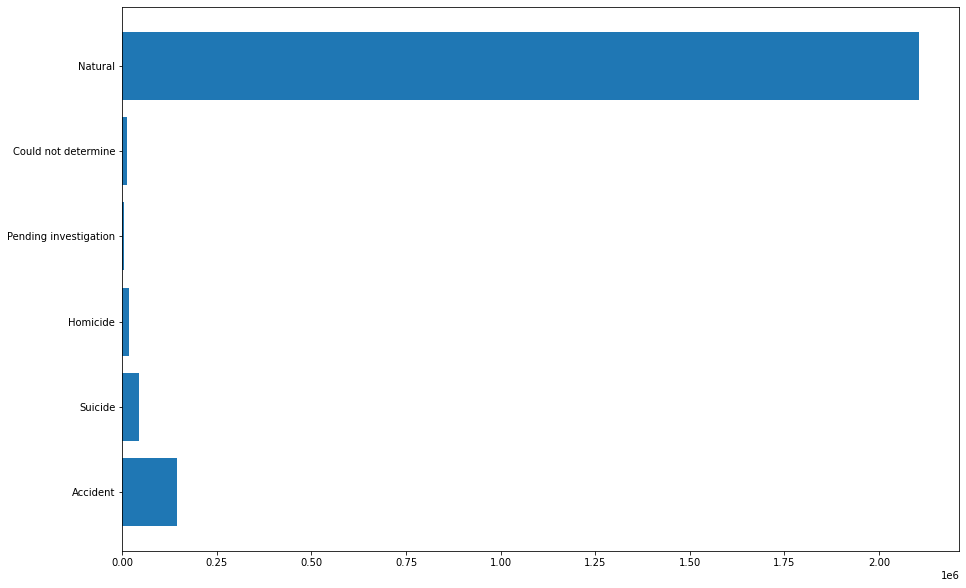

In [21]:
cause_of_death = ['Accident', 'Suicide', 'Homicide', 'Pending investigation', 'Could not determine', 'Natural']

# Get the manner of deaths counts
manner_counts = data['manner_of_death'].sort_values().value_counts(sort=False)

#plot
plt.figure(figsize=(15,10))
plt.barh(cause_of_death, manner_counts)

As seen by the above cell, the most common cause of death in the year of 2015 was natural cause with 2,107,352 people. The other manners of death are as indicated:

  - 1 : Accident
  - 2 : Suicide
  - 3 : Homicide
  - 4 : Pending investigation
  - 5 : Could not determine
  - 6 : Self-Inflicted
  - 7 : Natural
  - Blank : Not specified

The second most common cause of death is Accident and the third with a considerably less number of cases is suicide

#Most Common Location of Deaths

In [22]:
#obtain the most common values that fall under the 'activity code' 'place_of_injury_for_causes_w00_y34_except_y06_and_y07_' and 'place_of_death_and_decedents_status' columns for each month
data.groupby('month_of_death')[['activity_code', 'place_of_injury_for_causes_w00_y34_except_y06_and_y07_', 'place_of_death_and_decedents_status']].aggregate(pd.Series.mode)

,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,place_of_death_and_decedents_status
month_of_death,,,
1,9.0,0.0,1
2,9.0,0.0,1
3,9.0,0.0,1
4,9.0,0.0,1
5,9.0,0.0,4
6,9.0,0.0,4
7,9.0,0.0,4
8,9.0,0.0,4
9,9.0,0.0,4


'place_of_death_and_decedents_status'
  - 1 : Hospital, clinic or Medical Center (Inpatient)
  - 2 : Hospital, Clinic or Medical Center (Outpatient or admitted to Emergency Room)
  - 3 : Hospital, Clinic or Medical Center (Dead on Arrival)
  - 4 : Decedent’s home
  - 5 : Hospice facility
  - 6 : Nursing home/long term care
  - 7 : Other
  - 9 : Place of death unknown

As shown above, when examining the data throughout all age groups, the only column whos values differ is the 'place of death and decedents status' column. It starts with a value of 1 - indicating that the place of death is in a hosplital, clinic, or medical center. 

It then changes to 4 (Decendent's home) in the month of May and then changes back to 1 in December.

#Race and Death

When examining race and death, I must find the total number of each race to compare them correctly. Without examining the data with percentages, the data would be incredibly skewed, as there are far more white Americans.

Data of populations by race in US obtained from [statistics](https://www.statista.com/statistics/183489/population-of-the-us-by-ethnicity-since-2000/)

This source shows the amount of people who fall into different races. As we can see from the numbers, white Americans make up about 247 million, African Americans make up about 43 million, American Indians make up about 4 million, Hawaiian makes up about 750 thousand and Asian makes up about 18 million. With these numbers we can calculate the deaths percentage from the total amount to accurately compare the different death rates

In [23]:
#Calculate the total amount of people in the US in 2015 
#These numbers are taken from the source above
white_total = 247.38*1000000
black_total = 42.53*1000000
indian_total = 4*1000000
hawaiian_total = 0.75*1000000
asian_total = 17.75*1000000

#Find the amount of deaths for each race
races = data['race'].sort_values().value_counts(sort=False)

#Calculate the total by adding the number of deaths per race
total = races[4]+races[5]+races[7]+races[18]+races[28]+races[48]+races[68]+races[78]

#Print the results in percentage form
print("Percentage of Deaths: \n")
print("White: {:.2f}%".format((races[1]/white_total)*100))
print("Black or African American: {:.2f}%".format((races[2]/black_total)*100))
print("American Indian: {:.2f}%".format((races[3]/indian_total)*100))
print("Native Hawaiian: {:.2f}%".format((races[6]/hawaiian_total)*100))
print("Asian: {:.2f}%".format((total/asian_total)*100))

Percentage of Deaths: 

White: 0.93%
Black or African American: 0.75%
American Indian: 0.48%
Native Hawaiian: 0.10%
Asian: 0.37%


From the above code, we can see that white Americans lost .93 percent of the total population in 2015, and African American, American Indian, Hawaiian, and Asian fall in behind with percentages of 0.75%, 0.48%, 0.10%, and 0.37%. 

#Distribution of Deaths Through Months

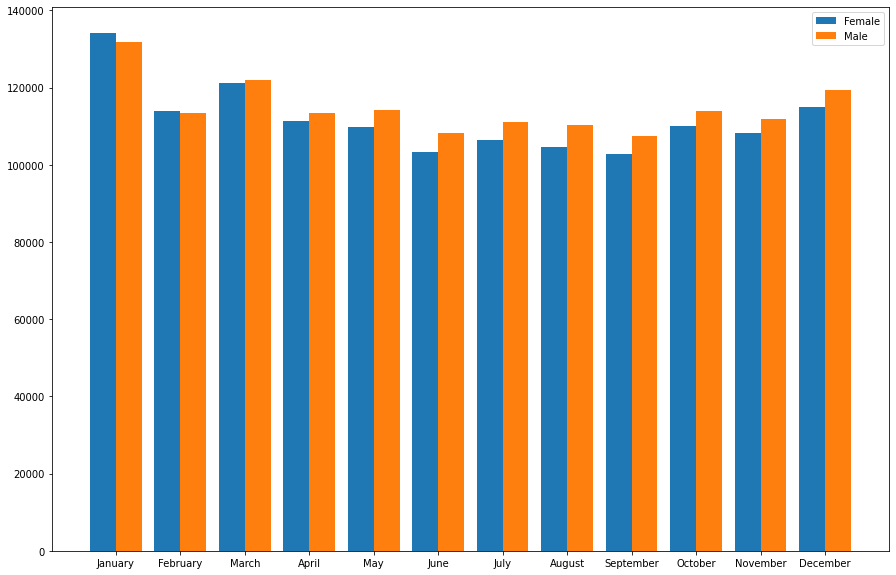

In [24]:
#Get the counts of the month values (1-12)
female_data = data[data['sex'] == 'M']
male_data = data[data['sex'] == 'F']
month_data_female = male_data['month_of_death'].sort_values().value_counts(sort=False)
month_data_male = female_data['month_of_death'].sort_values().value_counts(sort=False)
#Must make a list of the month names not the numbers 1-12
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#I am reversing the lists here because it makes a little more sense that way
x_axis = np.arange(len(months))

plt.figure(figsize=(15,10))

plt.bar(x_axis -0.2, month_data_female, width = 0.4, label = 'Female')
plt.bar(x_axis +0.2, month_data_male, width = 0.4, label = 'Male')

plt.xticks(x_axis, months)

plt.legend()

plt.show()

As we can see by the bar plot above, the most deaths occur during the month of January with male and female having a fairly similar amount. Interestingly, women died at a higher rate during that month, as opposed to the other months excluding February. As for the rest of the months, men died at a higher rate by a significant amount. 


#Suicide Rate Throughout Months For 20-24 Year Olds


<BarContainer object of 12 artists>

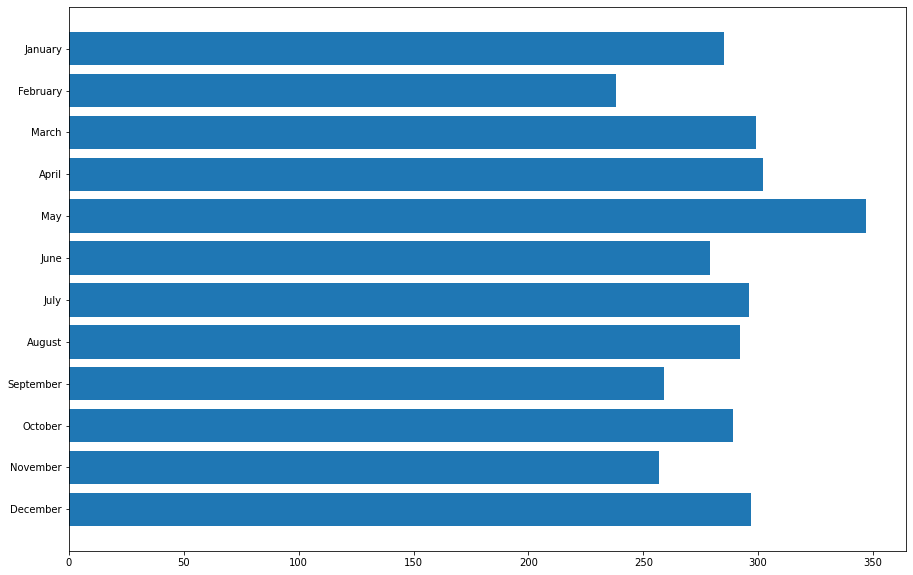

In [25]:
#find the number of suicides of 20-24 year olds throughout the months of the year 2015
suicide_through_months = data[(data['manner_of_death'] == 2) & (data['age_recode_52'] == 30)].groupby('month_of_death').aggregate('count')['manner_of_death']

plt.figure(figsize=(15,10))

#Reverse the months and suicide arrays here to make the plot more readable
plt.barh(months[::-1], suicide_through_months.values[::-1])

I wanted to examine the age group that I fall into most specifically when it comes to the problem of suicide. Unfortunately, we see a large amount of deaths during the month of May for the year 2015. Examining why deaths are highest in this month likely comes from many sources. Alot of pressure is put on people during these years in general and during the month of May it is only worse.

#Education Level

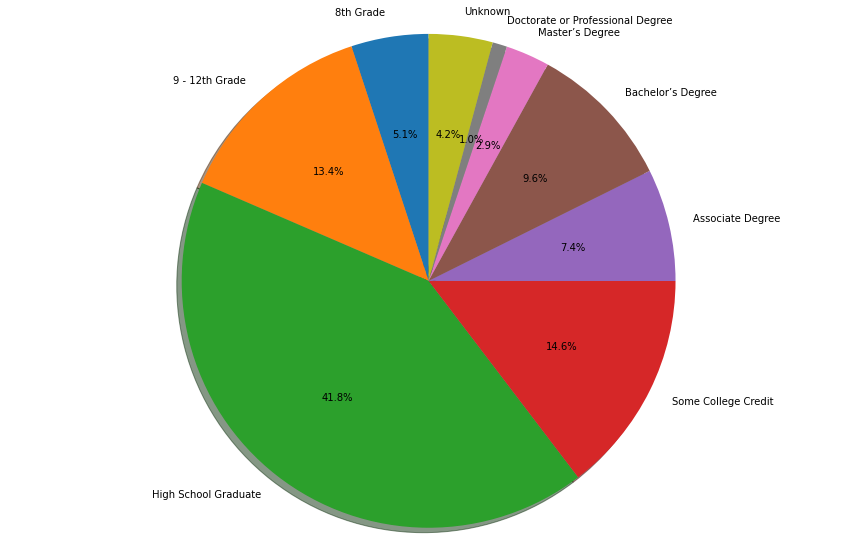

In [26]:
#get dfs for respective education levels
per_8thgrade = data[(data['age_recode_52'] == 35) & (data['education_2003_revision'] == 1)].count()[0]
per_no_diploma = data[(data['age_recode_52'] == 35) & (data['education_2003_revision'] == 2)].count()[0]
perc_highschool = data[(data['age_recode_52'] == 35) & (data['education_2003_revision'] == 3)].count()[0]
perc_college = data[(data['age_recode_52'] == 35) & (data['education_2003_revision'] == 4)].count()[0]
per_associate = data[(data['age_recode_52'] == 35) & (data['education_2003_revision'] == 5)].count()[0]
per_bachelor = data[(data['age_recode_52'] == 35) & (data['education_2003_revision'] == 6)].count()[0]
per_masters = data[(data['age_recode_52'] == 35) & (data['education_2003_revision'] == 7)].count()[0]
per_doctorate = data[(data['age_recode_52'] == 35) & (data['education_2003_revision'] == 8)].count()[0]
per_unknown = data[(data['age_recode_52'] == 35) & (data['education_2003_revision'] == 9)].count()[0]

#Calculate the total from these amounts
total = per_8thgrade+per_no_diploma+perc_highschool+perc_college+per_associate+per_bachelor+per_masters+per_doctorate+per_unknown
print()

#find the actual decimal value of each
per_8thgrade = per_8thgrade/total
per_no_diploma = per_no_diploma/total
perc_highschool = perc_highschool/total
perc_college = perc_college/total
per_associate = per_associate/total
per_bachellor = per_bachelor/total
per_masters = per_masters/total
per_doctorate = per_doctorate/total
per_unknown = per_unknown/total

#Lay out the labels that are linked to the numbers
labels = '8th Grade', '9 - 12th Grade', 'High School Graduate', 'Some College Credit', 'Associate Degree', 'Bachelor’s Degree', 'Master’s Degree', 'Doctorate or Professional Degree', 'Unknown'
sizes = np.array([per_8thgrade, per_no_diploma, perc_highschool, perc_college, per_associate, per_bachellor, per_masters, per_doctorate, per_unknown])

fig1, ax1 = plt.subplots(figsize=(15,10))

#Create pie plot with the sizes array multiplied by 100 to get the actual percentage
ax1.pie(sizes*100, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

When examining education level of people who died in the 45-49 age range, we can see the distribution as seen above. We see a majority of High School Graduate with a percentage of 41.8%. When it comes to the next largest percentage, 9-12 Grade and Some College Credit are fairly close. Trailing behind not too far are Bachelor's Degree and Associate Degree. Clearly the main average here is High school Graduate, as the other higher percentages vary around that. 

#Breakdown of Age Group Deaths


Text(0, 0.5, 'Age Group')

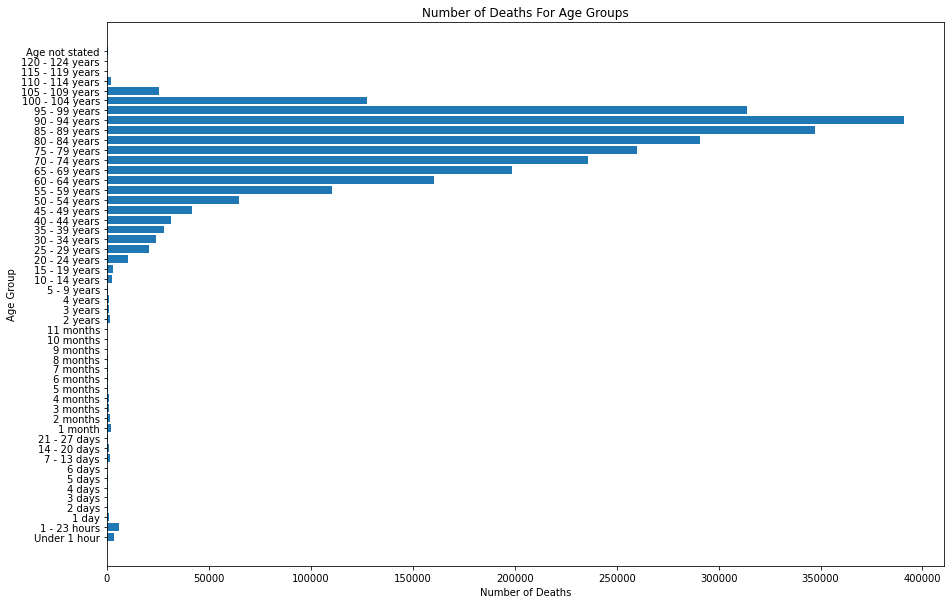

In [27]:
#get the age and the counts of each 
age_counts = data['age_recode_52'].sort_values().value_counts(sort=False)

time_ranges = ['Under 1 hour', '1 - 23 hours', '1 day', '2 days', '3 days', '4 days', '5 days', '6 days', '7 - 13 days', '14 - 20 days', 
 '21 - 27 days', '1 month', '2 months', '3 months', '4 months', '5 months', '6 months', '7 months', '8 months', '9 months', '10 months', 
'11 months', '2 years', '3 years', '4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', 
'35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', 
'75 - 79 years', '80 - 84 years', '85 - 89 years', '90 - 94 years', '95 - 99 years', '100 - 104 years'
, '105 - 109 years', '110 - 114 years', '115 - 119 years', '120 - 124 years', 'Age not stated']

plt.figure(figsize=(15,10))

plt.barh(time_ranges, age_counts)
plt.title('Number of Deaths For Age Groups')
plt.xlabel('Number of Deaths')
plt.ylabel('Age Group')

Using a horizontal bar plot, we can easily visualize the distribution of the number of deaths for each age group. We see the most deaths occur in the 90 - 94 year old range. Coming after this age group in number of deaths is 85 - 89 years old. After that is 95 - 99 year old age group. This obviously makes the most sense in the grand scheme. This also correlates with the fact that the most common cause of death is natural. This statistic does not indicate the most common cause of death per age group. 

#Manner of Death for Age Groups

Text(0, 0.5, 'Manner of Death')

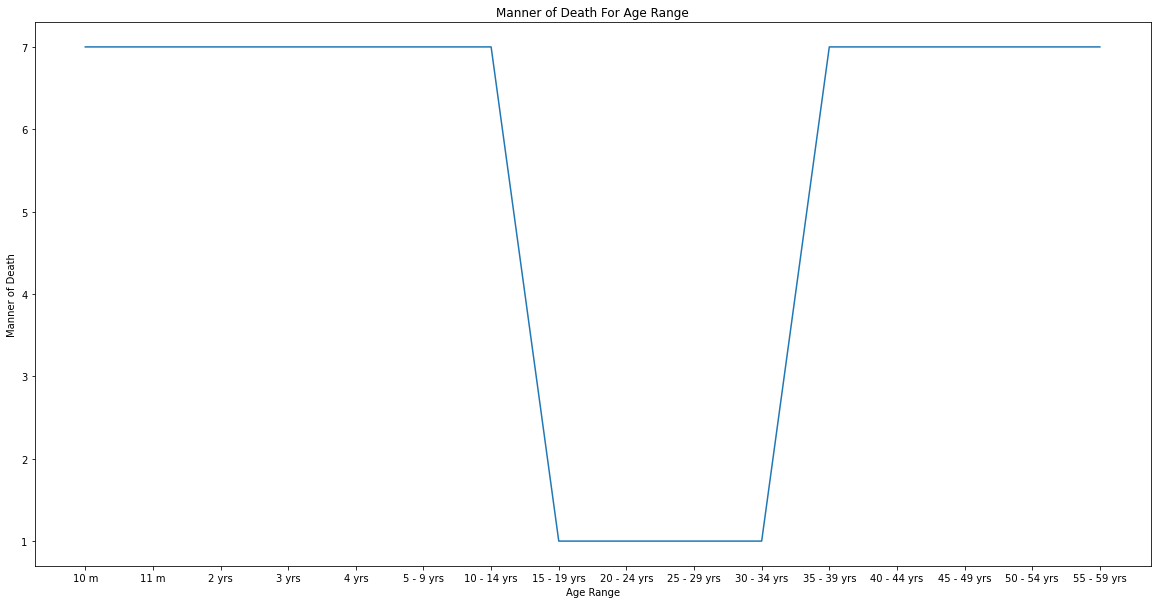

In [28]:
#find the manner of death for each age group
type_per_age = data.groupby('age_recode_52')['manner_of_death'].aggregate(pd.Series.mode)

time_ranges = ['10 m', '11 m', '2 yrs', '3 yrs', '4 yrs', '5 - 9 yrs', '10 - 14 yrs', '15 - 19 yrs', '20 - 24 yrs', '25 - 29 yrs', '30 - 34 yrs', 
'35 - 39 yrs', '40 - 44 yrs', '45 - 49 yrs', '50 - 54 yrs', '55 - 59 yrs']

plt.figure(figsize=(20,10))

# plot only a slice of the type_per_age array because displaying the rest is unneeded and messy
# The other values all hold a value of 7 anyway, so displaying them is useless and crowded
plt.plot(time_ranges, type_per_age[21:37])
plt.title('Manner of Death For Age Range')
plt.xlabel('Age Range')
plt.ylabel('Manner of Death')

'manner_of_death'
  - 1 : Accident
  - 2 : Suicide
  - 3 : Homicide
  - 4 : Pending investigation
  - 5 : Could not determine
  - 6 : Self-Inflicted
  - 7 : Natural
  - Blank : Not specified

When examining the manner of death for each age group, the majority is 7 which indicates that the death was of natural causes. However, we do see a change in this trend during the range 15 - 34 years old. In this specific range, the most common cause of death was 'Accident'. This makes the most sense, as in this age range, people are likely healthy meaning that a death would most likely not be of natural causes. I did not include all age ranges in the line plot because the rest of the results held a value of 7 just like the ranges shown above excluding 15 - 34. Without those entries, the plot is much easier to read and understand
